# Iowa Liquor Sales Trends 2016-2019

![](banner_iowa_liquor.jpg)

Kernel Density Estimation (KDE)

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)

.................................................... start of document ....................................................

## Situation

The Iowa Department of Commerce requires that every store that sells alcohol in bottled form for off-the-premises consumption must hold a class "E" liquor license (an arrangement typical of most of the state alcohol regulatory bodies). All alcohol sales made by stores registered thusly with the Iowa Department of Commerce are logged in the Commerce department system, which is in turn published as open data by the State of Iowa.  The full dataset contains information on the name, kind, price, quantity, and location of sale of sales of individual containers or packages of containers of alcoholic beverages.  The datasets we use here are paritions of the full dataset by years 2017, 2018, and 2019, and have been prepared for analysis.

* **Role:** Sales & marketing manager or product manager for a liquor wholesaler, Iowa region. 
* **Business Decisions:** What is your product bundling strategy?  What is your product pricing strategy?
* **Approach:** Determine (an approximation of) the underlying processes for Iowa retail liquor sales in 2017, 2018, and 2019 periods, use insights to inform your strategy decisions.  
* **Dataset:** State of Iowa, Department of Commerce, Retail Liquor Sales (https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy)

## Underlying Process for 2019 Sales Transactions

### Retrieve data for 2019.

In [18]:
clock.start()
datax = read.csv("Iowa_Liquor_Sales.csv")
datax = datax[, c(2,3,4,22,23)]
datax[1:3,]
clock.stop()

Date,Store.Number,Store.Name,Sale..Dollars.,Volume.Sold..Liters.
05/19/2014,3700,Avoca Liquor,26.26,1.50
08/15/2012,3762,Wine and Spirits Gallery,22.49,1.00
01/16/2012,2622,Hy-Vee Food Store / Iowa City,86.97,2.25


Time difference of 20.58503 mins


In [19]:
clock.start()
x = mdy(datax$Date)
clock.stop()


Time difference of 20.64717 secs


In [20]:
clock.start()
datax$year = year(x)
datax$month = month(x)
datax$day = day(x)
clock.stop()

Time difference of 13.43685 secs


In [21]:
datax$Date = NULL

In [22]:
colnames(datax) = c("store_ID","store_name","sale.dollars","volume.gallons","year","month","day")

In [23]:
datax[1:3,]

store_ID,store_name,sale.dollars,volume.gallons,year,month,day
3700,Avoca Liquor,26.26,1.50,2014,5,19
3762,Wine and Spirits Gallery,22.49,1.00,2012,8,15
2622,Hy-Vee Food Store / Iowa City,86.97,2.25,2012,1,16


In [29]:
datax.2019 = datax[datax$year==2019,]
write.csv(datax.2019, "Iowa Liquor 2019.csv", row.names=FALSE)

In [30]:
data.2019.all = read.csv("Iowa Liquor 2019.csv")
size(data.2019.all)
head(data.2019.all)

observations,variables
2380345,7


store_ID,store_name,sale.dollars,volume.gallons,year,month,day
5068,Tobacco Shop / Arnolds Park,43.56,12.00,2019,5,15
2588,Hy-Vee Food and Drug #6 / Cedar Rapids,19.89,0.75,2019,5,16
2647,Hy-Vee #7 / Cedar Rapids,60.72,9.00,2019,5,15
5202,Casey's General Store #2900 / Gilber,33.72,2.25,2019,5,14
2552,Hy-Vee Food Store #3 / Cedar Rapids,22.50,1.00,2019,5,13
5097,Fareway Stores #151 / Cedar Rapids,1761.84,126.00,2019,5,16


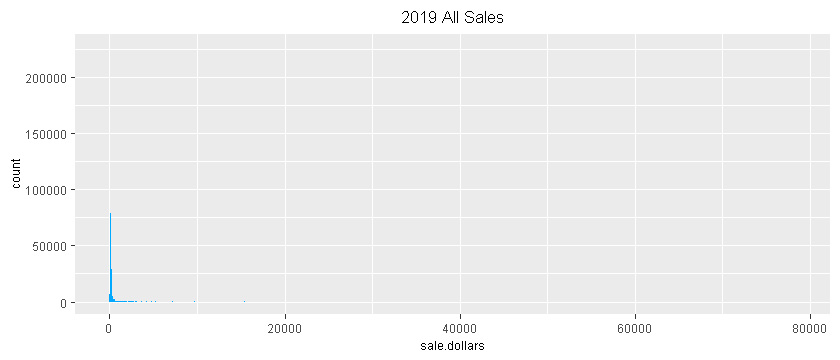

In [31]:
ggplot(data.2019.all) + ggtitle("2019 All Sales") + geom_histogram(aes(x=sale.dollars), binwidth=10, fill=PALETTE[1])

### Focus on sub-\\$500 transactions.

In [32]:
data.frame(min_value=min(data.2019.all$sale.dollars), # minimum value transaction
           max_value=max(data.2019.all$sale.dollars), # maximum value transaction
           number_transactions_over_500=length(which(data.2019.all$sale.dollars > 500)), # number of transactions over $500
           fraction_transactions_over_500=length(which(data.2019.all$sale.dollars > 500)) / nrow(data.2019.all)) # fraction of transactions over $500

min_value,max_value,number_transactions_over_500,fraction_transactions_over_500
1.34,78435,73647,0.03093963


In [34]:
data.2019 = read.csv("Iowa Liquor 2019.csv") # not strictly necessary to read file again
data.2019 = data.2019[data.2019$sale.dollars<=500,]
size(data.2019)
head(data.2019)

observations,variables
2306698,7


,store_ID,store_name,sale.dollars,volume.gallons,year,month,day
1,5068,Tobacco Shop / Arnolds Park,43.56,12.00,2019,5,15
2,2588,Hy-Vee Food and Drug #6 / Cedar Rapids,19.89,0.75,2019,5,16
3,2647,Hy-Vee #7 / Cedar Rapids,60.72,9.00,2019,5,15
4,5202,Casey's General Store #2900 / Gilber,33.72,2.25,2019,5,14
5,2552,Hy-Vee Food Store #3 / Cedar Rapids,22.50,1.00,2019,5,13
7,5593,Grandview Mart,13.31,0.50,2019,5,13


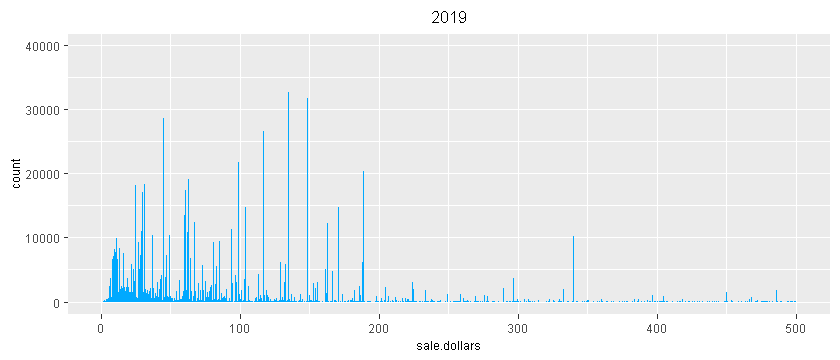

In [35]:
ggplot(data.2019) + ggtitle("2019") + geom_histogram(aes(x=sale.dollars), binwidth=0.2, fill=PALETTE[1])

### Explore possible underlying processes.

Try kernel density estimation with gaussian, rectangular, and triangular kernels, all at bandwidth 50.

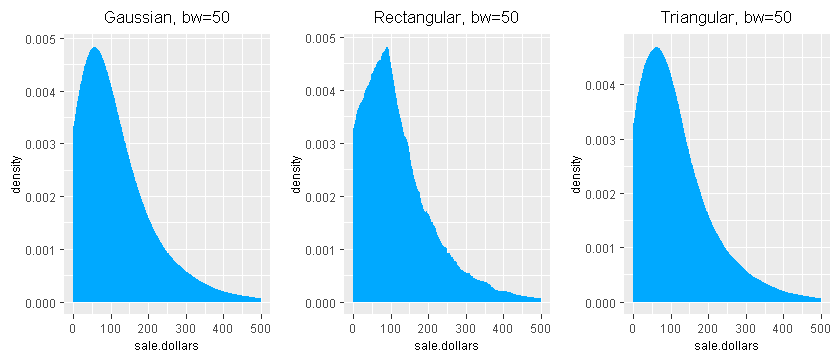

In [36]:
p = ggplot(data.2019)

grid.arrange(p + ggtitle("Gaussian, bw=50")    + geom_density(aes(sale.dollars), kernel="gaussian",    bw=50),
             p + ggtitle("Rectangular, bw=50") + geom_density(aes(sale.dollars), kernel="rectangular", bw=50),
             p + ggtitle("Triangular, bw=50")  + geom_density(aes(sale.dollars), kernel="triangular",  bw=50),
             nrow=1)

### Explore more possible underlying processes.

Try kernel density estimation with gaussian kernel as bandwidths (standard deviations) 1, 10, 50.

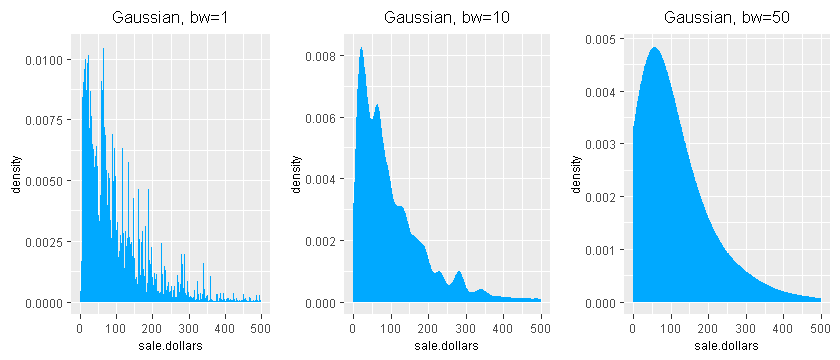

In [37]:
p = ggplot(data.2019)

grid.arrange(p + ggtitle("Gaussian, bw=1")  + geom_density(aes(sale.dollars), kernel="gaussian", bw=1),
             p + ggtitle("Gaussian, bw=10") + geom_density(aes(sale.dollars), kernel="gaussian", bw=10),
             p + ggtitle("Gaussian, bw=50") + geom_density(aes(sale.dollars), kernel="gaussian", bw=50),
             nrow=1)

## Compare Underlying Processes for 2016, 2017, 2018, 2019

### Retrieve data for 2016, 2017, 2018, 2019.  Focus on sub-\\$500 transactions.

In [38]:
data.2016 = read.csv("Iowa Liquor 2016.csv")
size(data.2016)

data.2016 = data.2016[data.2016$sale.dollars<500,]
size(data.2016)
head(data.2016)

observations,variables
2279879,7


observations,variables
2242670,7


,store_ID,store_name,sale.dollars,volume.gallons,year,month,day
1,3621,"Jensen Liquors, Ltd.",32.25,0.20,2016,1,26
2,2552,Hy-Vee Food Store #3 / Cedar Rapids,58.74,0.40,2016,1,12
3,2513,Hy-Vee Food Store #2 / Iowa City,352.44,2.38,2016,1,13
4,3869,Bootleggin' Barzini's Fin,88.11,0.59,2016,1,13
5,2106,Hillstreet News and Tobacco,29.37,0.20,2016,1,14
7,2651,Hy-Vee / Waverly,29.37,0.20,2016,1,5


In [39]:
data.2017 = read.csv("Iowa Liquor 2017.csv")
size(data.2017)

data.2017 = data.2017[data.2017$sale.dollars<500,]
size(data.2017)
head(data.2017)

observations,variables
2291276,7


observations,variables
2226444,7


store_ID,store_name,sale.dollars,volume.gallons,year,month,day
2543,Hy-Vee Food Store #1 / Ottumwa,18.00,1.50,2017,11,8
5320,Central Grocery,72.00,9.00,2017,1,30
5070,Jeff's Market / Wilton,13.26,2.00,2017,1,9
4478,U S Gas,7.20,0.50,2017,3,24
4478,U S Gas,37.08,2.25,2017,2,3
4640,Mart Stop #1 / Davenport,368.64,9.00,2017,12,6


In [40]:
data.2018 = read.csv("Iowa Liquor 2018.csv")
size(data.2018)

data.2018 = data.2018[data.2018$sale.dollars<500,]
size(data.2018)
head(data.2018)

observations,variables
2355558,7


observations,variables
2285881,7


,store_ID,store_name,sale.dollars,volume.gallons,year,month,day
1,4617,Lickety Liquor,93.44,3,2018,9,4
2,4004,Wal-Mart 4256 / Ames,342.00,21,2018,10,24
3,4129,Cyclone Liquors,42.52,2,2018,10,24
4,2502,Hy-Vee Wine and Spirits / Ankeny,495.00,9,2018,10,24
5,5600,H & A Mini Mart,60.72,9,2018,10,29
7,2651,Hy-Vee / Waverly,16.26,2,2018,10,29


### Compare total transactions by year.

year,transactions
2016,2242670
2017,2226444
2018,2285881
2019,2306698


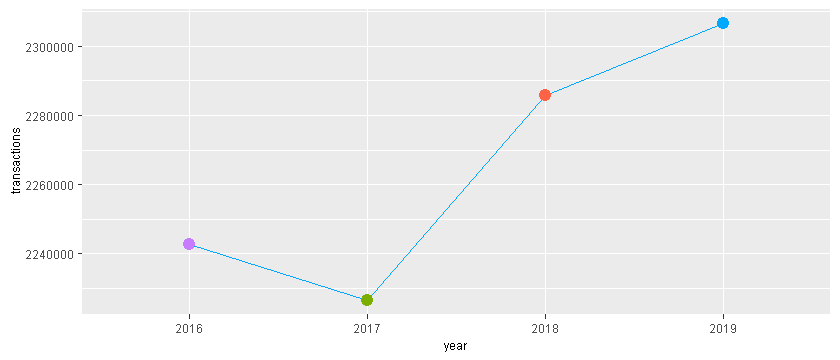

In [41]:
data.compare_transactions = data.frame(year=c("2016", "2017", "2018", "2019"),
                                       transactions=c(nrow(data.2016), nrow(data.2017), nrow(data.2018), nrow(data.2019)))
data.compare_transactions

ggplot(data.compare_transactions) +
geom_line(aes(x=year, y=transactions, group=1)) +
geom_point(aes(x=year, y=transactions, color=year)) +
scale_color_manual(values=rev(PALETTE[1:4])) +
theme.no_legend

### Compare total sales by year.

year,sales
2016,198275574
2017,212521376
2018,222445636
2019,232454793


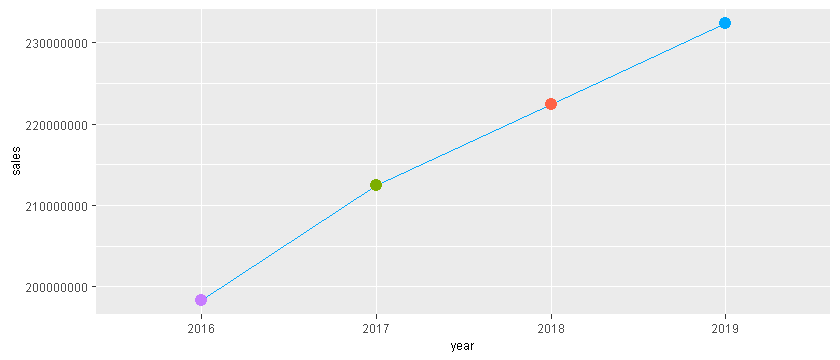

In [42]:
data.compare_sales = data.frame(year=c("2016", "2017", "2018", "2019"),
                                sales=c(sum(data.2016$sale.dollars), sum(data.2017$sale.dollars), sum(data.2018$sale.dollars), sum(data.2019$sale.dollars)))
data.compare_sales

ggplot(data.compare_sales) +
geom_line(aes(x=year, y=sales, group=1)) +
geom_point(aes(x=year, y=sales, color=year)) +
scale_color_manual(values=rev(PALETTE[1:4])) +
theme.no_legend

### Compare distributions by year.

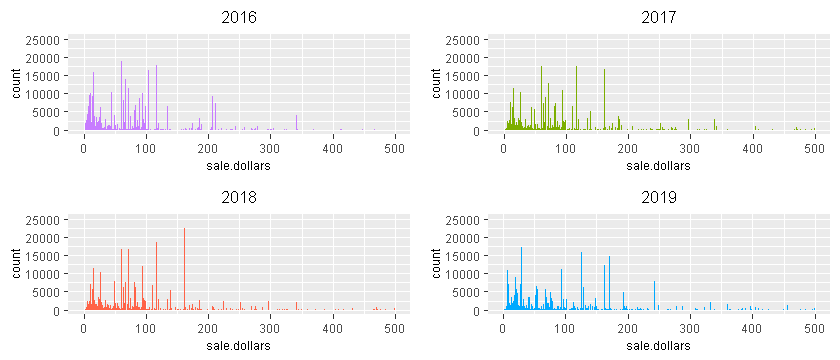

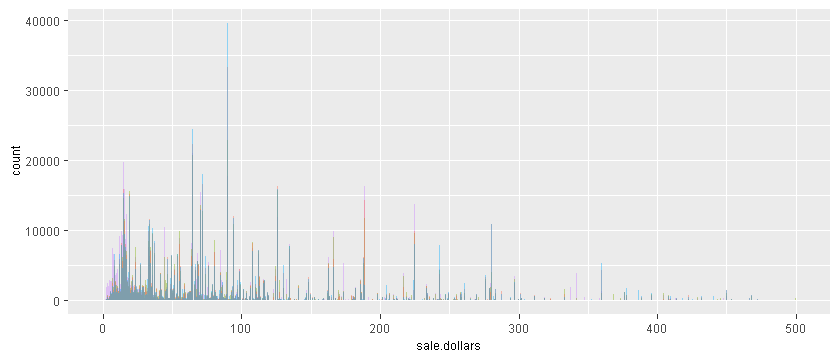

In [43]:
p1 = ggplot(data.2016) + ggtitle("2016") + ylim(0,25000) + geom_histogram(aes(x=sale.dollars), binwidth=0.2, fill=PALETTE[4], na.rm=TRUE)
p2 = ggplot(data.2017) + ggtitle("2017") + ylim(0,25000) + geom_histogram(aes(x=sale.dollars), binwidth=0.2, fill=PALETTE[3], na.rm=TRUE)
p3 = ggplot(data.2018) + ggtitle("2018") + ylim(0,25000) + geom_histogram(aes(x=sale.dollars), binwidth=0.2, fill=PALETTE[2], na.rm=TRUE)
p4 = ggplot(data.2019) + ggtitle("2019") + ylim(0,25000) + geom_histogram(aes(x=sale.dollars), binwidth=0.2, fill=PALETTE[1], na.rm=TRUE)

grid.arrange(p1, p2, p3, p4, nrow=2, ncol=2)

ggplot() + xlim(0,500) +
geom_histogram(aes(x=sale.dollars), data=data.2016, binwidth=0.2, fill=PALETTE[4], alpha=0.4, na.rm=TRUE) +
geom_histogram(aes(x=sale.dollars), data=data.2017, binwidth=0.2, fill=PALETTE[3], alpha=0.4, na.rm=TRUE) +
geom_histogram(aes(x=sale.dollars), data=data.2018, binwidth=0.2, fill=PALETTE[2], alpha=0.4, na.rm=TRUE) +
geom_histogram(aes(x=sale.dollars), data=data.2019, binwidth=0.2, fill=PALETTE[1], alpha=0.4, na.rm=TRUE)

### Choose a useful underlying process.

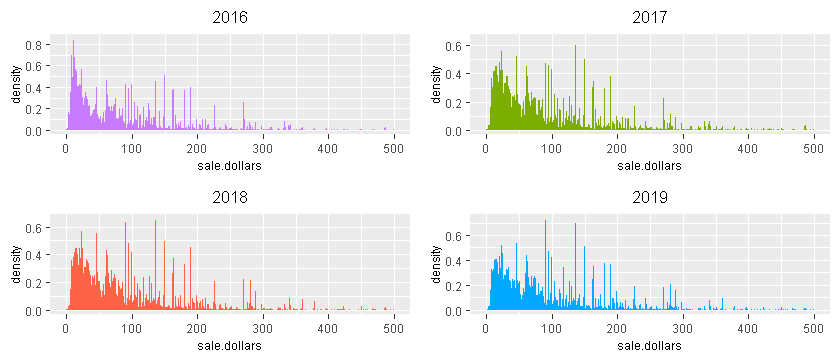

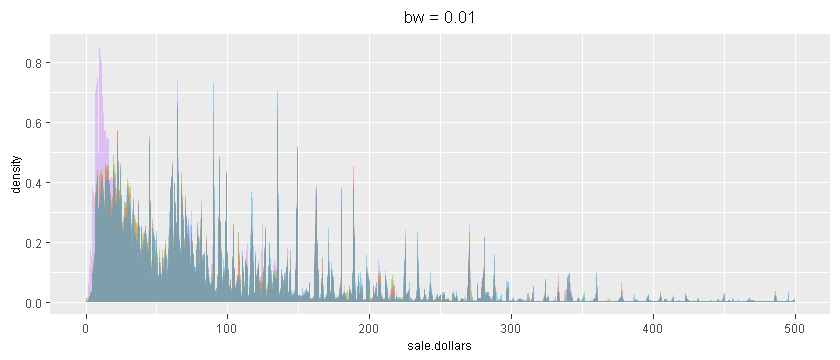

In [44]:
bandwidth = 0.01

p1 = ggplot(data.2016) + ggtitle("2016") + xlim(0,500) +
     geom_density(aes(sale.dollars), kernel="gaussian", bw=bandwidth, fill=PALETTE[4])

p2 = ggplot(data.2017) + ggtitle("2017") + xlim(0,500) +
     geom_density(aes(sale.dollars), kernel="gaussian", bw=bandwidth, fill=PALETTE[3])

p3 = ggplot(data.2018) + ggtitle("2018") + xlim(0,500) +
     geom_density(aes(sale.dollars), kernel="gaussian", bw=bandwidth, fill=PALETTE[2])

p4 = ggplot(data.2019) + ggtitle("2019") + xlim(0,500) +
     geom_density(aes(sale.dollars), kernel="gaussian", bw=bandwidth, fill=PALETTE[1])

grid.arrange(p1, p2, p3, p4, nrow=2, ncol=2)

ggplot() + ggtitle(sprintf("bw = %0.2f", bandwidth)) + xlim(0,500) +
geom_density(aes(sale.dollars), data=data.2016, kernel="gaussian", bw=bandwidth, fill=PALETTE[4], alpha=0.4) +
geom_density(aes(sale.dollars), data=data.2017, kernel="gaussian", bw=bandwidth, fill=PALETTE[3], alpha=0.4) +
geom_density(aes(sale.dollars), data=data.2018, kernel="gaussian", bw=bandwidth, fill=PALETTE[2], alpha=0.4) +
geom_density(aes(sale.dollars), data=data.2019, kernel="gaussian", bw=bandwidth, fill=PALETTE[1], alpha=0.4)

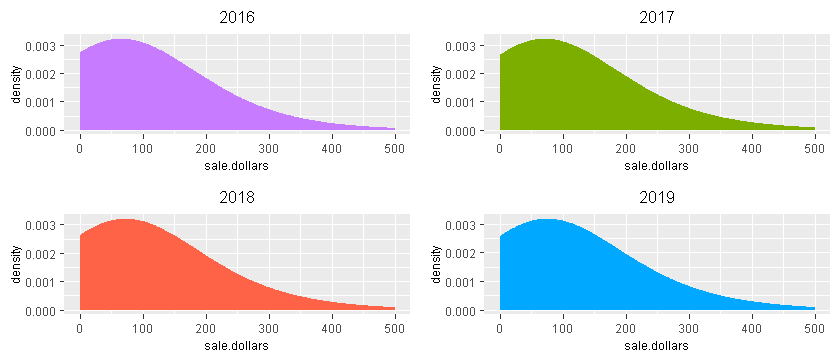

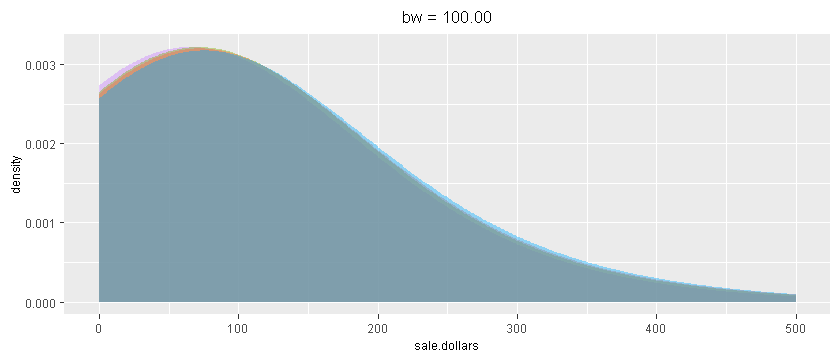

In [45]:
bandwidth = 100

p1 = ggplot(data.2016) + ggtitle("2016") + xlim(0,500) +
     geom_density(aes(sale.dollars), kernel="gaussian", bw=bandwidth, fill=PALETTE[4])

p2 = ggplot(data.2017) + ggtitle("2017") + xlim(0,500) +
     geom_density(aes(sale.dollars), kernel="gaussian", bw=bandwidth, fill=PALETTE[3])

p3 = ggplot(data.2018) + ggtitle("2018") + xlim(0,500) +
     geom_density(aes(sale.dollars), kernel="gaussian", bw=bandwidth, fill=PALETTE[2])

p4 = ggplot(data.2019) + ggtitle("2019") + xlim(0,500) +
     geom_density(aes(sale.dollars), kernel="gaussian", bw=bandwidth, fill=PALETTE[1])

grid.arrange(p1, p2, p3, p4, nrow=2, ncol=2)

ggplot() + ggtitle(sprintf("bw = %0.2f", bandwidth)) + xlim(0,500) +
geom_density(aes(sale.dollars), data=data.2016, kernel="gaussian", bw=bandwidth, fill=PALETTE[4], alpha=0.4) +
geom_density(aes(sale.dollars), data=data.2017, kernel="gaussian", bw=bandwidth, fill=PALETTE[3], alpha=0.4) +
geom_density(aes(sale.dollars), data=data.2018, kernel="gaussian", bw=bandwidth, fill=PALETTE[2], alpha=0.4) +
geom_density(aes(sale.dollars), data=data.2019, kernel="gaussian", bw=bandwidth, fill=PALETTE[1], alpha=0.4)

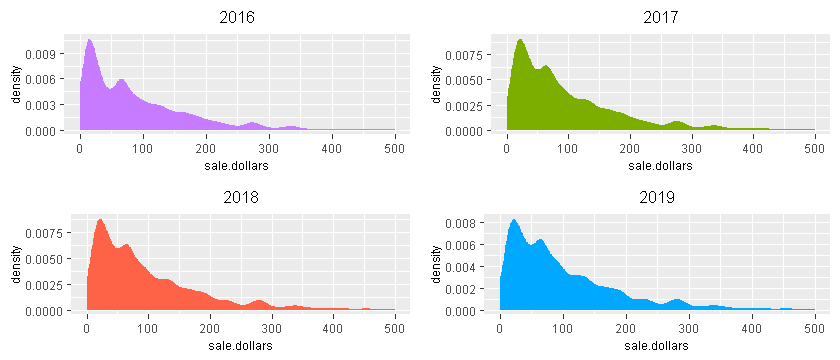

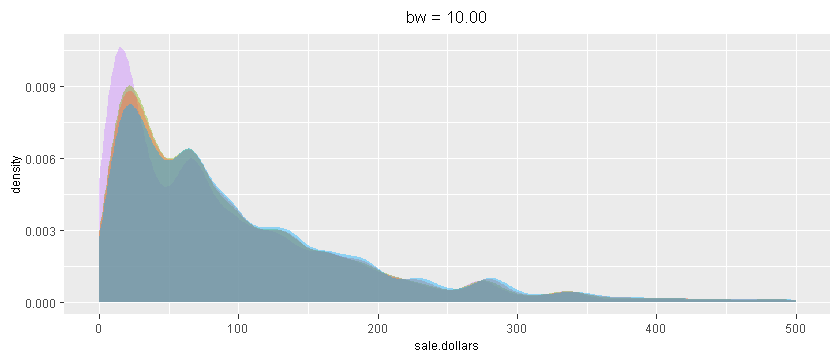

In [46]:
bandwidth = 10

p1 = ggplot(data.2016) + ggtitle("2016") + xlim(0,500) +
     geom_density(aes(sale.dollars), kernel="gaussian", bw=bandwidth, fill=PALETTE[4])

p2 = ggplot(data.2017) + ggtitle("2017") + xlim(0,500) +
     geom_density(aes(sale.dollars), kernel="gaussian", bw=bandwidth, fill=PALETTE[3])

p3 = ggplot(data.2018) + ggtitle("2018") + xlim(0,500) +
     geom_density(aes(sale.dollars), kernel="gaussian", bw=bandwidth, fill=PALETTE[2])

p4 = ggplot(data.2019) + ggtitle("2019") + xlim(0,500) +
     geom_density(aes(sale.dollars), kernel="gaussian", bw=bandwidth, fill=PALETTE[1])

grid.arrange(p1, p2, p3, p4, nrow=2, ncol=2)

ggplot() + ggtitle(sprintf("bw = %0.2f", bandwidth)) + xlim(0,500) +
geom_density(aes(sale.dollars), data=data.2016, kernel="gaussian", bw=bandwidth, fill=PALETTE[4], alpha=0.4) +
geom_density(aes(sale.dollars), data=data.2017, kernel="gaussian", bw=bandwidth, fill=PALETTE[3], alpha=0.4) +
geom_density(aes(sale.dollars), data=data.2018, kernel="gaussian", bw=bandwidth, fill=PALETTE[2], alpha=0.4) +
geom_density(aes(sale.dollars), data=data.2019, kernel="gaussian", bw=bandwidth, fill=PALETTE[1], alpha=0.4)

## Implications for Low-\\$ Transactions

### \\$0 to \\$20

In [47]:
d = density(data.2016$sale.dollars, kernel="gaussian", bw=10, from=0, to=500)
pdf = approxfun(d)
p.2016.0_20 = integrate(pdf, 0, 20)$value
data.frame(p.2016.0_20)

p.2016.0_20
0.1809047


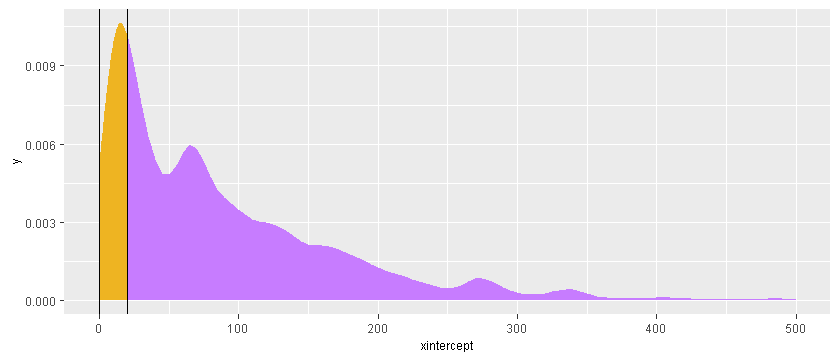

In [48]:
ggplot(data=data.2016) + xlim(0,500) +
stat_function(fun=pdf, geom="area", fill=PALETTE[4]) +
stat_function(fun=pdf, geom="area", xlim=c(0,20), fill=PALETTE[5]) +
geom_vline(xintercept=0) + geom_vline(xintercept=20)

In [49]:
d = density(data.2017$sale.dollars, kernel="gaussian", bw=10, from=0, to=500)
pdf = approxfun(d)
p.2017.0_20 = integrate(pdf, 0, 20)$value
data.frame(p.2017.0_20)

p.2017.0_20
0.1312675


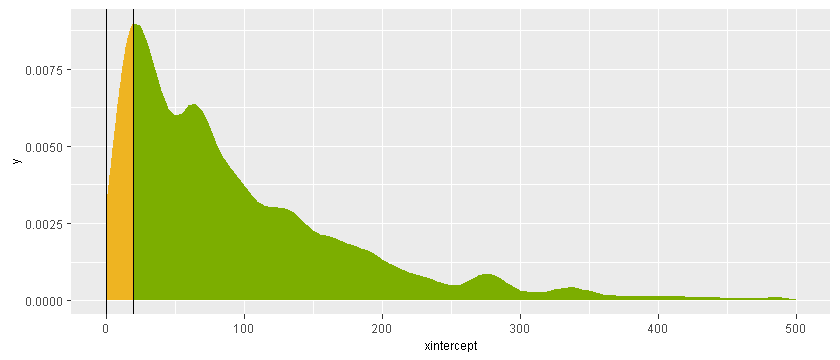

In [50]:
ggplot(data=data.2017) + xlim(0,500) +
stat_function(fun=pdf, geom="area", fill=PALETTE[3]) +
stat_function(fun=pdf, geom="area", xlim=c(0,20), fill=PALETTE[5]) +
geom_vline(xintercept=0) + geom_vline(xintercept=20)

In [51]:
d = density(data.2018$sale.dollars, kernel="gaussian", bw=10, from=0, to=500)
pdf = approxfun(d)
p.2018.0_20 = integrate(pdf, 0, 20)$value
data.frame(p.2018.0_20)

p.2018.0_20
0.1278739


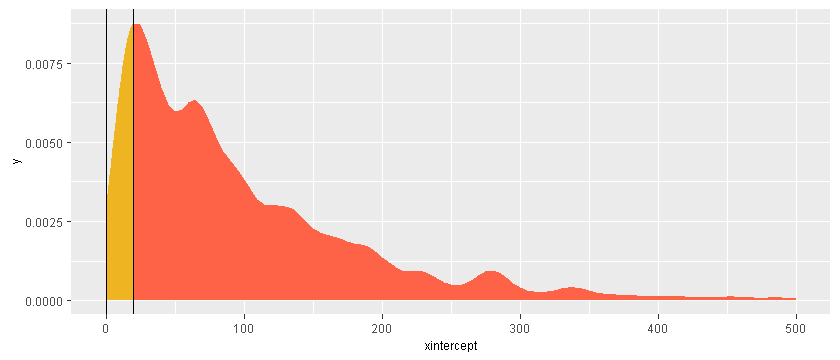

In [52]:
ggplot(data=data.2018) + xlim(0,500) +
stat_function(fun=pdf, geom="area", fill=PALETTE[2]) +
stat_function(fun=pdf, geom="area", xlim=c(0,20), fill=PALETTE[5]) +
geom_vline(xintercept=0) + geom_vline(xintercept=20)

In [53]:
d = density(data.2019$sale.dollars, kernel="gaussian", bw=10, from=0, to=500)
pdf = approxfun(d)
p.2019.0_20 = integrate(pdf, 0, 20)$value
data.frame(p.2019.0_20)

p.2019.0_20
0.1196529


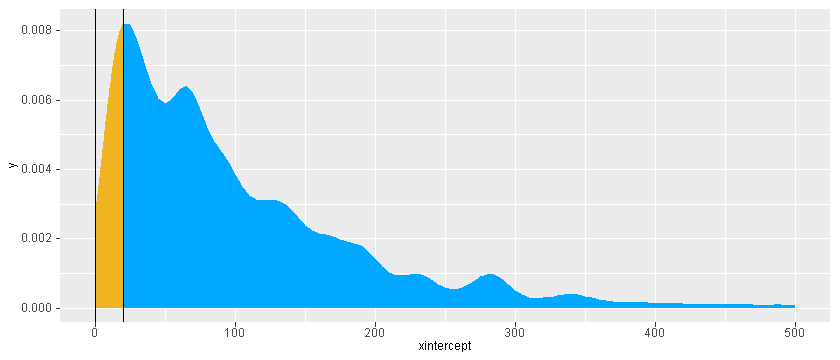

In [54]:
ggplot(data=data.2019) + xlim(0,500) +
stat_function(fun=pdf, geom="area", fill=PALETTE[1]) +
stat_function(fun=pdf, geom="area", xlim=c(0,20), fill=PALETTE[5]) +
geom_vline(xintercept=0) + geom_vline(xintercept=20)

year,probability
2016,0.1809047
2017,0.1312675
2018,0.1278739
2019,0.1196529


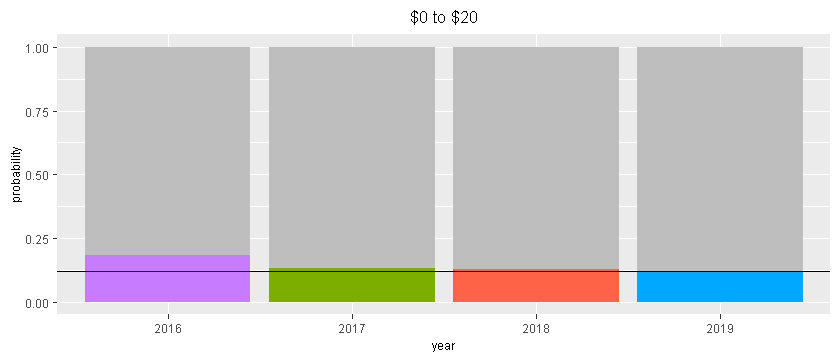

In [55]:
data.0_20 = data.frame(year=c("2016", "2017", "2018", "2019"),
                       probability=c(p.2016.0_20, p.2017.0_20, p.2018.0_20, p.2019.0_20))
data.0_20

ggplot(data.0_20) + ggtitle("$0 to $20") + ylab("probability") +
geom_col(aes(x=year, y=1), fill="gray") +
geom_col(aes(x=year, y=probability, fill=year)) +
geom_hline(yintercept=data.0_20$probability[4]) +
scale_fill_manual(values=rev(PALETTE[1:4])) +
theme.no_legend

### \\$20 to \\$50

In [56]:
d = density(data.2016$sale.dollars, kernel="gaussian", bw=10, from=0, to=500)
pdf = approxfun(d)
p.2016.20_50 = integrate(pdf, 20, 50)$value
data.frame(p.2016.20_50)

p.2016.20_50
0.2029079


In [57]:
d = density(data.2017$sale.dollars, kernel="gaussian", bw=10, from=0, to=500)
pdf = approxfun(d)
p.2017.20_50 = integrate(pdf, 20, 50)$value
data.frame(p.2017.20_50)

p.2017.20_50
0.2271491


In [58]:
d = density(data.2018$sale.dollars, kernel="gaussian", bw=10, from=0, to=500)
pdf = approxfun(d)
p.2018.20_50 = integrate(pdf, 20, 50)$value
data.frame(p.2018.20_50)

p.2018.20_50
0.223197


In [59]:
d = density(data.2019$sale.dollars, kernel="gaussian", bw=10, from=0, to=500)
pdf = approxfun(d)
p.2019.20_50 = integrate(pdf, 20, 50)$value
data.frame(p.2019.20_50)

p.2019.20_50
0.2128981


year,probability
2016,0.2029079
2017,0.2271491
2018,0.2231970
2019,0.2128981


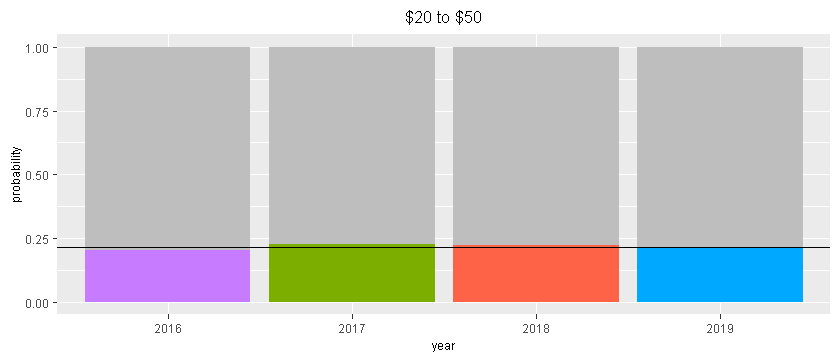

In [60]:
data.20_50 = data.frame(year=c("2016", "2017", "2018", "2019"), probability=c(p.2016.20_50, p.2017.20_50, p.2018.20_50, p.2019.20_50))
data.20_50

ggplot(data.20_50) + ggtitle("$20 to $50") + ylab("probability") +
geom_col(aes(x=year, y=1), fill="gray") +
geom_col(aes(x=year, y=probability, fill=year)) +
geom_hline(yintercept=data.20_50$probability[4]) +
scale_fill_manual(values=rev(PALETTE[1:4])) + 
theme.no_legend

## Discussion

* What insights are provided by the data that can inform your decision?
* What other insights might you find with more data exploration?
* What is your bundling strategy?
* What is your pricing strategy?

<font size=1;>
<p style="text-align: left;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float: right;">
document revised February 12, 2020
</span>
</p>
</font>